In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
from TargetDistributions.Mueller_potential import MuellerPotential
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils.plotting_utils import plot_distributions
from FittedModels.train import LearntDistributionManager
from Utils.plotting_utils import plot_distribution
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from FittedModels.utils.plotting_utils import plot_samples_vs_contours_many_well as plot_samples_vs_contours
torch.set_default_dtype(torch.float64)

In [9]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()

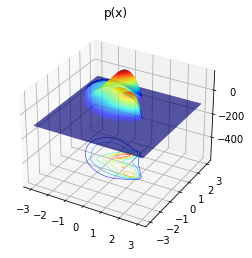

In [10]:
target = MuellerPotential()
dist = plot_distribution(target, bounds=[[-3, 3], [-3, 3]], n_points=300)
plt.show()

# Alpha=2

In [15]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 2
epochs = int(5e3)
n_samples_estimation = int(1e5)
batch_size = int(1e3)
lr = 1e-5
optimizer = "Adam"
loss_type = "DReG"  # "kl"  #
initial_flow_scaling = 2.0
n_flow_steps = 30
annealing = True
flow_type = "RealNVP"
n_plots = 10

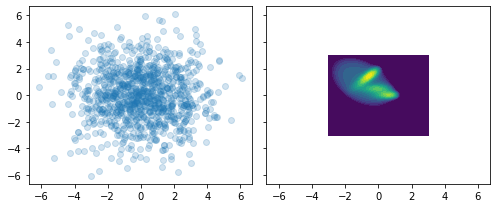

loss: 137.93524574217173, mean log p_x -3.4775590117717906e+26:   0%|                                                                                         | 0/5000 [00:00<?, ?it/s]

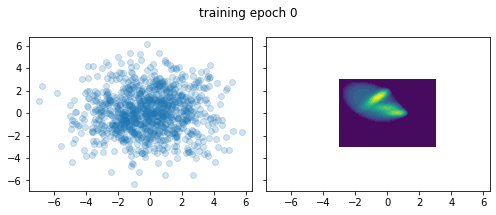

loss: 136.18397441196979, mean log p_x -1.887528245897537e+39:  10%|████████                                                                        | 500/5000 [00:44<06:01, 12.43it/s]

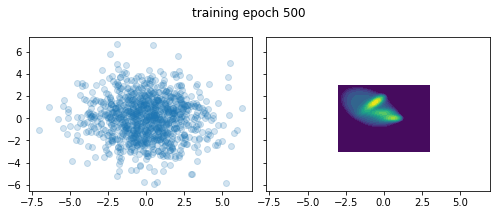

loss: 136.18397441196979, mean log p_x -1.887528245897537e+39:  10%|████████                                                                        | 502/5000 [00:44<11:13,  6.68it/s]

ESS is 3.8032372623110615


loss: 148.8611995564513, mean log p_x -9817156782906734.0:  20%|████████████████▌                                                                  | 1000/5000 [01:27<05:46, 11.54it/s]

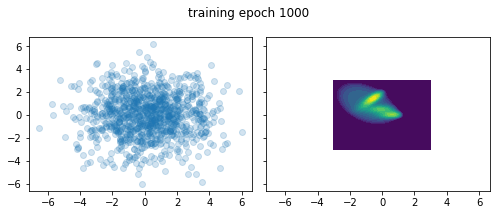

loss: 148.8611995564513, mean log p_x -9817156782906734.0:  20%|████████████████▋                                                                  | 1002/5000 [01:28<11:05,  6.01it/s]

ESS is 3.506339968533613


loss: 86.74652134280154, mean log p_x -4.5593046908404997e+18:  30%|███████████████████████▋                                                       | 1500/5000 [02:12<04:58, 11.72it/s]

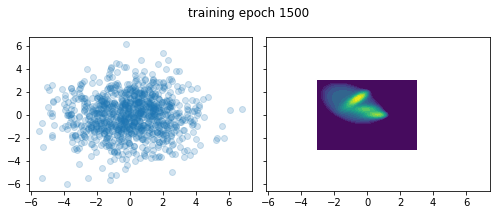

loss: 86.74652134280154, mean log p_x -4.5593046908404997e+18:  30%|███████████████████████▋                                                       | 1502/5000 [02:12<08:58,  6.50it/s]

ESS is 3.7941010133630364


loss: 147.0111719857879, mean log p_x -1.8847274698121404e+19:  37%|█████████████████████████████▎                                                 | 1853/5000 [02:43<04:37, 11.32it/s]


KeyboardInterrupt: 

In [16]:
torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)


history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=True, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots,
                      clip_grad_max=True)
plot_history(history)
plt.show()
plot_divergences(history)
plt.show()
plot_sampling_info(history)
plt.show()

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

plot_samples_vs_contours(tester)
plt.show()


# KL

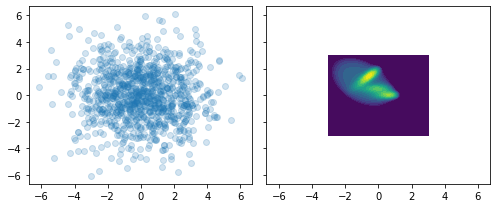

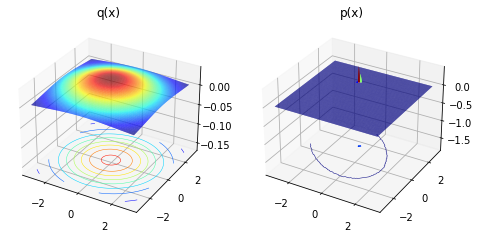

loss: 3.477559011771791e+24, mean log p_x -3.4775590117717906e+26:   0%|                                                                                     | 0/10000 [00:00<?, ?it/s]

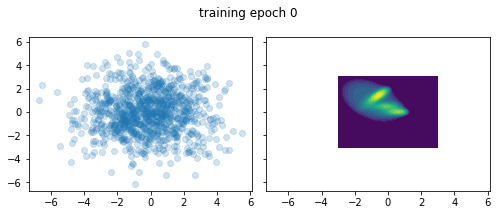

loss: -26.98581675716972, mean log p_x 141.2728593474409:  10%|████████▍                                                                           | 999/10000 [01:01<09:16, 16.18it/s]

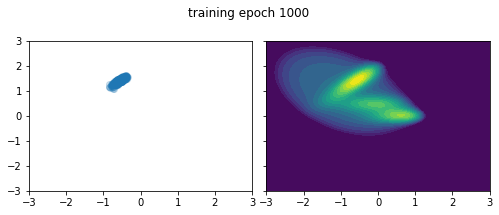

loss: -26.98581675716972, mean log p_x 141.2728593474409:  10%|████████▎                                                                          | 1003/10000 [01:02<16:33,  9.06it/s]

ESS is 1679.5518250880684


loss: -29.78966481841347, mean log p_x 141.50161617515218:  12%|█████████▌                                                                        | 1173/10000 [01:13<09:11, 15.99it/s]


KeyboardInterrupt: 

In [17]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 2
epochs = int(1e4)
n_samples_estimation = int(1e5)
batch_size = int(1e3)
lr = 1e-3
optimizer = "Adam"
loss_type = "kl"
initial_flow_scaling = 2.0
n_flow_steps = 30
annealing = True
flow_type = "RealNVP"
n_plots = 10
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()

torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=True, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)
plot_history(history)
plt.show()
plot_divergences(history)
plt.show()
plot_sampling_info(history)
plt.show()

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")


